### Part I: Pre-processing step 1 for data comming in Eclipse format (GRDECL)

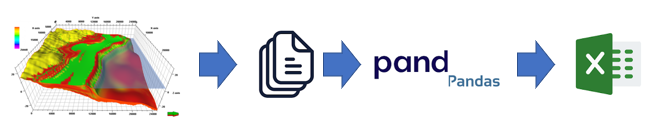

### Import the data

##### Import original raw data

In [ ]:
import os 
from petrel_utils import * 

version = '1.0'
data_file_name = 'STRESSYY.GRDECL'
data_file_name = 'STIFFNESS.GRDECL'
data_file_name = 'SINGLECELLDATA.GRDECL'

#process one file at a time or call process_all_files_one_go( files ) defined at the end of the notebook 
files= ['STRESSYY.GRDECL', 'STIFFNESS.GRDECL','SINGLECELLDATA.GRDECL']

##### file paths processing 

In [ ]:
DATA_FOLDER = os.path.abspath('../ALLDATA/' )
data_file = os.path.join( DATA_FOLDER,data_file_name)#assumed to be in the same folder as the jupyter notebook

##### parse raw data from Eclipse files and convert to pandas DataFrame 

In [ ]:
data_raw = EclipseFileParser.PetrelEclipseKeywords_to_pandas( data_file );

##### harmonize names of variables 

In [ ]:
harmonize_names( data_raw )

##### dataset 

In [ ]:
 data_raw

##### Sanity check. Just verify that there are no nans and values that must be possitive are actually possitive, etc. 

In [ ]:
def is_positive_delegate( collection )-> bool: 
    result =any( [c.min()<0 for c in collection])
    return result 

def is_condition( collection, condition )-> bool: 
    result =any( [condition(c) for c in collection])
    return result 

def any_nans( df: pd.DataFrame )->bool: 
    return any( df.isnull().sum() > 0 )
             
def check( df: object, checker )->bool:
    return checker( df )
    
print( f"Any nans ? {check( data_raw, any_nans )} ")

eff=[ data_raw[col] for col in data_raw.columns if "EFF" in col or "PRESS" in col ]
print( f"Any stress negative? {check( eff, is_positive_delegate )} ")

eff=[ data_raw[col] for col in data_raw.columns if "YOUNG" in col ]
print( f"Any stiffness negative? {check( eff, is_positive_delegate )} ")

eff=[ data_raw[col] for col in data_raw.columns if "POISS" in col ]
print( f"Any out-of-range Poisson's ratio? { is_condition(eff, lambda item: any(item <0.1) or any(item >0.5)  ) } ")


### Export in a compressed format 

In [ ]:
output_file_name = data_file.split('.')[0] + "_ver" + version + '_.csv'
output_file_name

In [ ]:
%time data_raw.to_feather(output_file_name)
print('saved file: ', output_file_name)

##### Check that the exported file can be read  

In [ ]:
##### Test that we can load it properly and quickly now
tot_columns = len( data_raw )
%time data_raw = pd.read_feather(output_file_name)

if tot_columns != len(data_raw):
    print("Bad export. ")

### End

### Process all files at once (optional)

In [ ]:
def process_all_files_one_go( files ):
    
    for data_file_name in files:
        
        print()
        data_file = os.path.join( DATA_FOLDER,data_file_name)
        data_raw = EclipseFileParser.PetrelEclipseKeywords_to_pandas( data_file );
        
        print()
        harmonize_names( data_raw )

        def is_positive_delegate( collection )-> bool: 
            result =any( [c.min()<0 for c in collection])
            return result 

        def is_condition( collection, condition )-> bool: 
            result =any( [condition(c) for c in collection])
            return result 

        def any_nans( df: pd.DataFrame )->bool: 
            return any( df.isnull().sum() > 0 )

        def check( df: object, checker )->bool:
            return checker( df )

        print( f"Any nans ? {check( data_raw, any_nans )} ")

        eff=[ data_raw[col] for col in data_raw.columns if "EFF" in col or "PRESS" in col  ]
        print( f"Any stress negative? {check( eff, is_positive_delegate )} ")

        eff=[ data_raw[col] for col in data_raw.columns if "YOUNG" in col ]
        print( f"Any stiffness negative? {check( eff, is_positive_delegate )} ")

        eff=[ data_raw[col] for col in data_raw.columns if "POISS" in col ]
        print( f"Any out-of-range Poisson's ratio? { is_condition(eff, lambda item: any(item <0.1) or any(item >0.5)  ) } ")

        print()
        output_file_name = data_file.split('.')[0] + "_ver" + version + '_.csv'
        output_file_name

        %time data_raw.to_feather(output_file_name)
        print('saved file: ', output_file_name)

        ##### Test that we can load it properly and quickly now
        tot_columns = len( data_raw )
        %time data_raw = pd.read_feather(output_file_name)

        if tot_columns != len(data_raw):
            print("Bad export. ")
            
            
process_all_files_one_go( files )


In [ ]:
[col for col in data_raw.columns if "EFF" in col or "PRESS" in col ]